In [51]:
# %load ../Coords/altaz.py
#!/usr/bin/env python
import numpy as np

lat=np.radians(-30.72148) #latitude of KAT
cla=np.cos(lat)
sla=np.sin(lat)

def elev(ha,dec):    #elevation and azimuth all in radians
    """"
    Given an Hour Angle and Decination in radians
    compute elevation and azimuth in radians
    - no checks for values
    """
    elev=np.arcsin((np.sin(dec)*sla +np.cos(dec)*np.cos(ha)*cla))   #elevation 
    azim=np.arctan2((np.cos(dec)*np.sin(ha)), \
                        (np.cos(dec)*np.cos(ha)*sla-np.sin(dec)*cla))#azimuth    
    return (azim,elev)
   
def hadec(az,el):  # all in radians
    """
    Given azimuth and Elevations in radians
    compute Hour Angle and Decination in radians
    - no checks for values
    -structure is almost  identical to elev but change cos(lat) <=> -sin(lat)
    """
    dec=np.arcsin(np.sin(el)*sla -np.cos(el)*np.cos(az)*cla)  #declination
    ha=np.arctan2((np.cos(el)*np.sin(az)),\
                      (np.sin(el)*cla+np.cos(el)*np.cos(az)*sla)) #hour angle
    return (ha,dec)

#ha=radians(90.0)   # for this case I am interested in extreme HA

#print "# El    Az   HA  Dec"
#for declin in range(-37,90,1):  # declination limit about 88.7deg
#    dec=radians(declin)
#    azel=elev(ha,dec)
#    el=azel[1]
#    az=azel[0]
#    if az<0:
#        az=az+radians(360)      # just a convention 
#    if el > 0 :                 # not interest in ranges where the telescope limits are negative elevations
#       print "%4.1f  %5.1f %3.1f %3.1f" % (degrees(el),degrees(az),degrees(ha),degrees(dec))

#el=0
#for azim in range(-90,90,1):
#    az=radians(azim)
#    hadc=hadec(az,el)
#    print degrees(hadc[0]), degrees(hadc[1])
"""
name=raw_input("What do you want to input, HADC or AZEL:  ")
if "h" in name or "H" in name:
    ha=np.radians(float(input("Hour angle in degrees: ")))
    dec=np.radians(float(input("Declination in degrees:")))
    azel=elev(ha,dec)
    print " Az: %8.3f El %8.3f" % (np.degrees(azel[0]), np.degrees(azel[1]))
elif "z" in name or "Z" in name:
    az=np.radians(float(input("Azimuth in degrees: ")))
    el=np.radians(float(input("Elevation in degrees:")))
    hadc=hadec(az,el)
    print " HA: %8.3f Dec %8.3f" % (np.degrees(hadc[0]), np.degrees(hadc[1]))
else:
    print "Sorry, I dont understand"
"""   


'\nname=raw_input("What do you want to input, HADC or AZEL:  ")\nif "h" in name or "H" in name:\n    ha=np.radians(float(input("Hour angle in degrees: ")))\n    dec=np.radians(float(input("Declination in degrees:")))\n    azel=elev(ha,dec)\n    print " Az: %8.3f El %8.3f" % (np.degrees(azel[0]), np.degrees(azel[1]))\nelif "z" in name or "Z" in name:\n    az=np.radians(float(input("Azimuth in degrees: ")))\n    el=np.radians(float(input("Elevation in degrees:")))\n    hadc=hadec(az,el)\n    print " HA: %8.3f Dec %8.3f" % (np.degrees(hadc[0]), np.degrees(hadc[1]))\nelse:\n    print "Sorry, I dont understand"\n'

In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt

[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
[[215.29543723 213.88427775 212.43091536 210.93506382 209.39663247
  207.81575177 206.19279878 204.52842177 202.82356326 201.07948026
  199.29776097 197.48033653 195.62948696 193.74784028 191.83836384
  189.90434749 187.94937817 185.97730605 183.99220285 181.99831313
  180.         178.00168687 176.00779715 174.02269395 172.05062183
  170.09565251 168.16163616 166.25215972 164.37051304 162.51966347
  160.70223903 158.92051974 157.17643674 155.47157823 153.80720122
  152.18424823 150.60336753 149.06493618 147.56908464 146.11572225
  144.70456277]
 [ 82.08991282  82.21192748  82.32948195  82.44236763  82.55037178
   82.65327868  82.7508708   82.84293034  82.92924081  83.00958889
   83.08376645  83.15157267  83.21281633  83.26731807  83.31491278
   83.35545182  83.38880526  83.414863

<IPython.core.display.Javascript object>


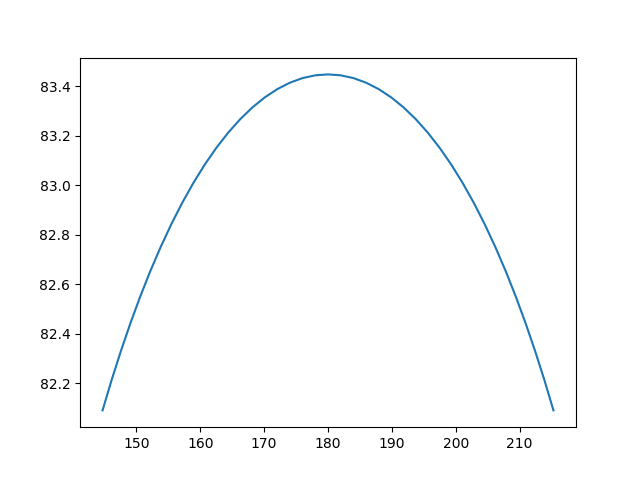

In [66]:
# 180 degrees of HA is 12*60=720 minutes of time, so 1 minute of time=180/720 degrees
step=180./720.
h=np.arange(-5,5+step,step)
print h/step
ha=np.radians(np.arange(-5,5+step,step))
dec=np.radians(-30.72+6.55)
print np.mod(np.degrees(elev(ha,dec)),360)
hay=np.mod(np.degrees(elev(ha,dec))[0],360)
for n in range(0,len(hay)-1):
    print "%6.3f" %(np.mod((hay[n] - hay[n+1]),360))
decx=np.degrees(elev(ha,dec))[1]
plt.plot(hay,decx)
plt.show()
